# Algorithm 2

In [1]:
import networkx as nx
import networkx.algorithms.community as nx_comm
import csv
from metrics import test
from cdlib import NodeClustering
from spreading_process_detection import get_communities_spreading_process
import matplotlib.pyplot as plt
import pandas as pd

### Real World Dataset

In [2]:
global_graph = nx.Graph()
ground_truth = [[] for _ in range(42)]
with open("eu-core/ground_truth.csv", newline='') as file:
    csvFile = csv.DictReader(file)
    for line in csvFile:
        ground_truth[int(line["Label"])].append(int(line["Node"]))

In [3]:
with open("eu-core/email.csv", newline='') as file:
    csvFile = csv.DictReader(file)
    for line in csvFile:
        global_graph.add_edge(int(line['Source']), int(line['Target']))
communities = get_communities_spreading_process(global_graph)

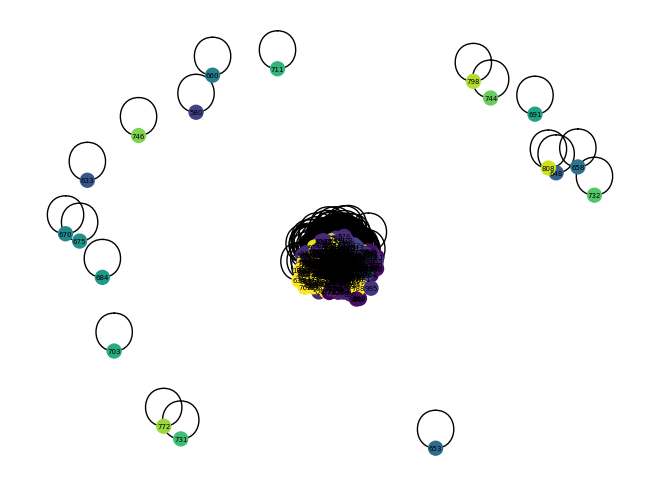

In [4]:
cmap = {}
for i in range(len(communities)):
    for node in communities[i]:
        cmap[node] = i+2
# plt.figure(figsize=(10, 6))
nx.draw(global_graph, node_color=[cmap.get(node, 1) for node in global_graph.nodes()], with_labels=True, node_size=100, font_size=5)
plt.show()

In [5]:
comm = [list(c) for c in communities]
comm = NodeClustering(comm, graph=None)
ground_truth = NodeClustering(ground_truth, graph=None)
results=test(global_graph,comm,ground_truth)
results = pd.DataFrame.from_dict(results, orient='index', columns=['Value'])
results

,Value
Modularity,0.432981
Conductance,0.119761
Expansion,3.911647
Cut-Ratio,0.004481
NMI,0.594497
ARI,0.329095
AMI,0.559444


### Synthetic

In [6]:
global_graph = nx.LFR_benchmark_graph(n=250, tau1=3, tau2=1.5, mu=0.1, average_degree=5, min_community=20, seed=10)
communities = get_communities_spreading_process(global_graph)

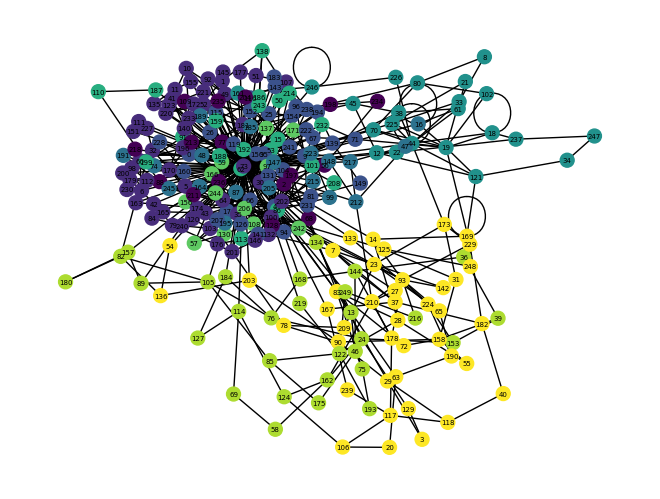

In [7]:
cmap = {}
for i in range(len(communities)):
    for node in communities[i]:
        cmap[node] = i+2
# plt.figure(figsize=(10, 6))
nx.draw(global_graph, node_color=[cmap.get(node, 1) for node in global_graph.nodes()], with_labels=True, node_size=100, font_size=5)
plt.show()

In [8]:
comm = [list(c) for c in communities]
comm = NodeClustering(comm, graph=None)
communities = {frozenset(global_graph.nodes[v]["community"]) for v in global_graph}
ground_truth = [list(c) for c in communities]
ground_truth = NodeClustering(ground_truth, graph=None)
results=test(global_graph,comm,ground_truth)
results = pd.DataFrame.from_dict(results, orient='index', columns=['Value'])
results

,Value
Modularity,0.468858
Conductance,0.371173
Expansion,1.656538
Cut-Ratio,0.007497
NMI,0.552902
ARI,0.272417
AMI,0.542073
